In [152]:
# antes de empezar importamos las librerías que necesitaremos para poder trabajar con todos sus métodos. También configuramos la opción de ver todas las columnas
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from scipy.stats import shapiro, kstest, poisson, chisquare, expon
from itertools import combinations



pd.set_option('display.max_columns', None)


In [153]:
df_abc = pd.read_csv("df_abc")
print(df_abc.head())


   employee_id attrition business_travel  daily_rate  distance_from_home  \
0            1        No      non-travel       684.0                   6   
1            2        No      non-travel       699.0                   1   
2            3        No   travel_rarely       532.0                   4   
3            4        No   travel_rarely       359.0                   2   
4            5        No      non-travel      1319.0                   3   

   education   education_field  environment_satisfaction  gender hourly_rate  \
0          3             Other                       1.0    male          51   
1          4     Life Sciences                       3.0    male          65   
2          2  Technical Degree                       3.0    male          58   
3          4           Medical                       1.0  female          82   
4          3  Technical Degree                       1.0  female          45   

   job_involvement  job_level           job_role  job_satisfac

In [154]:
df_abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   employee_id                 1614 non-null   int64  
 1   attrition                   1614 non-null   object 
 2   business_travel             1614 non-null   object 
 3   daily_rate                  1614 non-null   float64
 4   distance_from_home          1614 non-null   int64  
 5   education                   1614 non-null   int64  
 6   education_field             1614 non-null   object 
 7   environment_satisfaction    1514 non-null   float64
 8   gender                      1614 non-null   object 
 9   hourly_rate                 1614 non-null   object 
 10  job_involvement             1614 non-null   int64  
 11  job_level                   1614 non-null   int64  
 12  job_role                    1614 non-null   object 
 13  job_satisfaction            1614 

In [155]:
df_abc.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,1614.0,807.500000,466.065982,1.0,404.250000,807.500000,1210.750000,1614.0
daily_rate,1614.0,740.462825,442.453316,0.0,371.500000,722.500000,1130.750000,1499.0
distance_from_home,1614.0,11.141884,10.450560,1.0,2.000000,8.000000,17.000000,49.0
education,1614.0,2.925031,1.022357,1.0,2.000000,3.000000,4.000000,5.0
environment_satisfaction,1514.0,2.714003,1.098326,1.0,2.000000,3.000000,4.000000,4.0
job_involvement,1614.0,2.739777,0.711567,1.0,2.000000,3.000000,3.000000,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.000000,2.000000,3.000000,5.0
job_satisfaction,1614.0,2.738538,1.106163,1.0,2.000000,3.000000,4.000000,4.0
monthly_income,1614.0,56322.385378,33908.786047,10090.0,48590.000000,48590.000000,48590.000000,199990.0
monthly_rate,1614.0,14284.495663,7110.414585,2094.0,8001.000000,14248.500000,20364.000000,26999.0


In [156]:
#Grupo 1: GRUPO A df_a: Empleados del grupo que tienen un nivel de satisfacción igual o mayor a 3 
#Grupo 2: GRUPO B df_b: Empleados del grupo que tienen un nivel de satisfacción menor a 3 

In [157]:
mask = df_abc['general_satisfaction'] >= 3

In [158]:
## Creamos una máscara con la gente que tiene un nivel de satisfacción mayor o igual a 3
df_a = df_abc.loc[mask]
df_a.shape


(106, 33)

In [159]:
## Creamos una máscara con la gente que tiene un nivel de satisfacción menor a 3
df_b = df_abc.loc[~mask]
df_b.shape

(1508, 33)

In [160]:
print(f"apenas el {round(df_a.shape[0]/df_abc.shape[0]*100,2)}% de las personas empleadas en esta empresa tienen un nivel de satisfacción mayor a 3")

apenas el 6.57% de las personas empleadas en esta empresa tienen un nivel de satisfacción mayor a 3


Text(0.5, 1.0, 'Personas empleadas con un nivel de satisfacción mayor a 3')

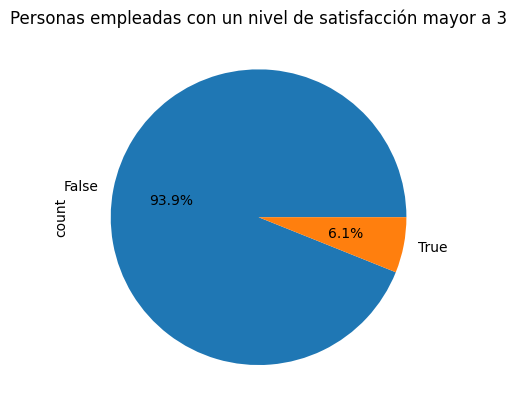

In [161]:
(df_abc['general_satisfaction']>3).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Personas empleadas con un nivel de satisfacción mayor a 3')




In [162]:
df_abc['satisfaction_group'] = pd.cut(df_abc['general_satisfaction'], bins=5, labels=[1, 2, 3, 4, 5])

# Ver los primeros datos para verificar el agrupamiento
print(df_abc[['general_satisfaction', 'satisfaction_group']].head())

   general_satisfaction satisfaction_group
0              2.222222                  3
1              2.916667                  3
2              2.694444                  3
3              1.722222                  2
4              1.250000                  2


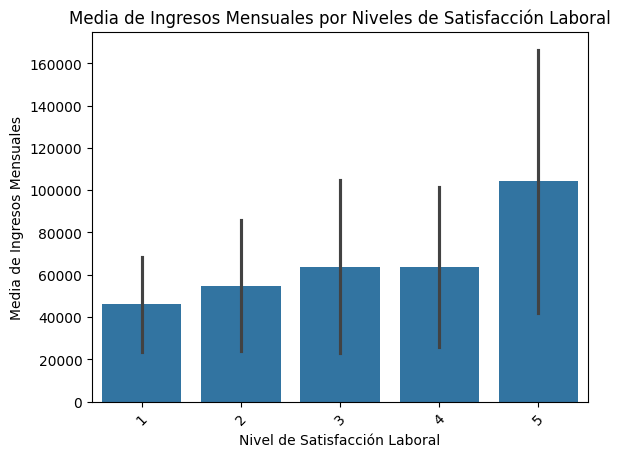

In [163]:
sns.barplot(data=df_abc, x='satisfaction_group', y='monthly_income', errorbar='sd')
plt.title('Media de Ingresos Mensuales por Niveles de Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Media de Ingresos Mensuales')
plt.xticks(rotation=45) 
plt.show()

In [164]:

## Podemos ver que hay una relación entre el ingreso mensual de las personas empleadas y el nivel de satisfacción. Podemos decir 
# que las personas con un nivel de satisfacción de 4 o 5, tienen en promedio un sueldo más alto. 

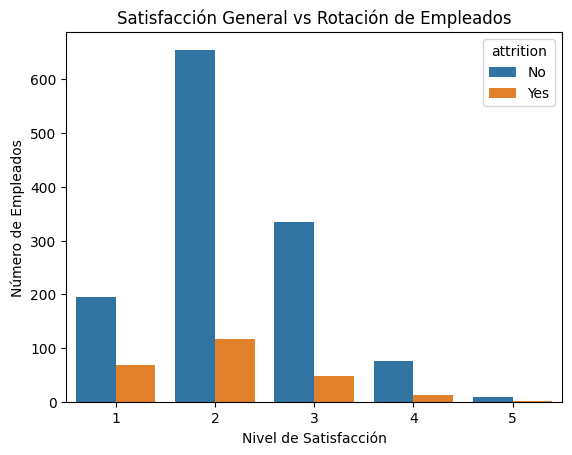

In [165]:
# Buscamos que este gráfico de barras nos permita ver la distribución de la rotación (attrition)en diferentes niveles de satisfacción
# ¿identificamos si las personas empleadas con menor satisfacción tienen mayor rotación?
# Crear un gráfico de barras apiladas
sns.countplot(data=df_abc, x="satisfaction_group", hue='attrition')
plt.title('Satisfacción General vs Rotación de Empleados')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Número de Empleados')
plt.show()

In [166]:
## En esta gráfica podemos observar que las personas que han abandonado la empresa tenían 
# un nivel de satisfacción bastante menor que el de las personas que no

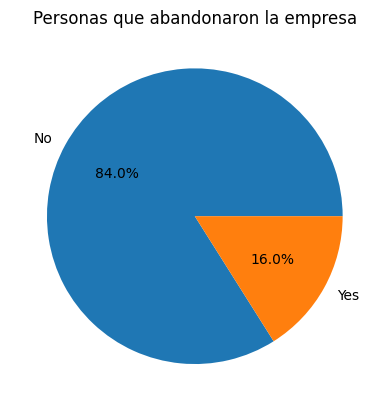

3

In [167]:
#Gráfico circular para ver la distribución de rotación
#Podemos ver de manera visual la proporcion de personas empleadas que han dejado la empresa frente a los que permanecen
#¿podemos ver de forma clara la distribución de rotación ?

df_abc['attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Personas que abandonaron la empresa')
plt.ylabel('')
plt.show()
3

In [168]:
## Podemos ver que el 16% de las personas han abandonado la empresa

In [169]:
attrition_mask = df_abc["attrition"] == "Yes"
df_stayers = df_abc[attrition_mask]

df_stayers.sample(2)

,employee_id,attrition,business_travel,daily_rate,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_time_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,role_department,remote_work,department,general_satisfaction,satisfaction_group
1417,1418,Yes,travel_frequently,544.0,3,2,Medical,2.0,female,70,3,1,Sales Representative,4,Single,15690.0,18420,1,Yes,12,3,0,0.0,2,4,0,0,0,2005,Sales Representative - Sales,True,Sales,0.527778,1
1531,1532,Yes,non-travel,1362.0,37,3,Marketing,1.0,male,67,4,2,Sales Executive,4,Unknown,53040.0,4652,8,Yes,13,2,0,0.0,3,2,5,0,4,1989,Unknown,False,unknown,2.944444,3


In [170]:

df_leavers = df_abc.loc[~attrition_mask]

df_leavers.sample(2)

,employee_id,attrition,business_travel,daily_rate,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_time_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,role_department,remote_work,department,general_satisfaction,satisfaction_group
145,146,No,non-travel,1099.0,5,3,Other,2.0,male,88,3,5,Manager,2,Married,182130.0,8751,7,No,11,3,1,26.0,5,3,22,3,10,1979,Unknown,True,unknown,2.388889,3
786,787,No,non-travel,557.0,18,4,Other,4.0,male,35,3,2,Research Scientist,1,Unknown,54100.0,11189,6,unknown,17,3,1,9.0,3,2,4,1,2,1981,Unknown,True,unknown,2.277778,3


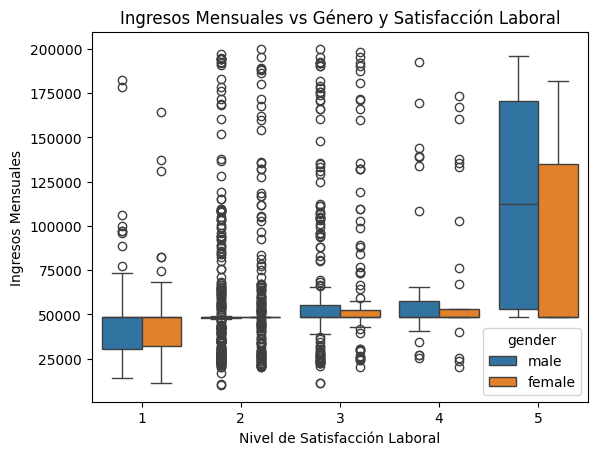

In [171]:
#Gráfico de cajas
# Es útil para comparar los ingresos mensuales monthly_income entre hombres y mujeres para cada grupo de satisfacción laboral
#¿podemos ver si hay diferencias en los ingresos según género y la satisfacción?

sns.boxplot(data=df_abc, x='satisfaction_group', y='monthly_income', hue='gender')
plt.title('Ingresos Mensuales vs Género y Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Ingresos Mensuales')
plt.show()


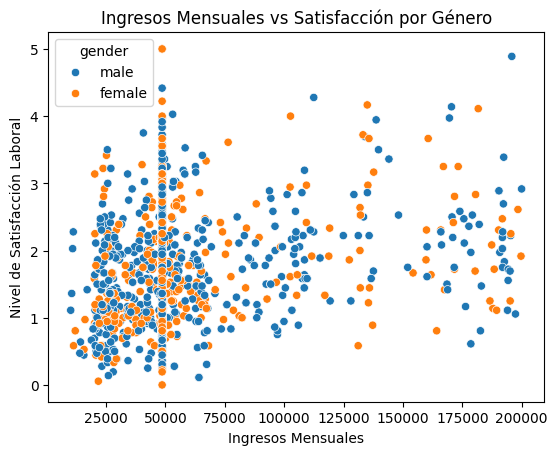

In [175]:
#Gráfico de dispersión
# Intentamos que nos muestre la relación entre los ingresos mensuales y el nivel de satisfacción dividido por género
#¿podemos ver la relación entre ingresos y satisfacción y cómo se distribuye según género?

sns.scatterplot(data=df_abc, x='monthly_income', y='general_satisfaction', hue='gender')
plt.title('Ingresos Mensuales vs Satisfacción por Género')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.show()


C:\Users\trico\AppData\Local\Temp\ipykernel_23572\3219589473.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Estado Civil')


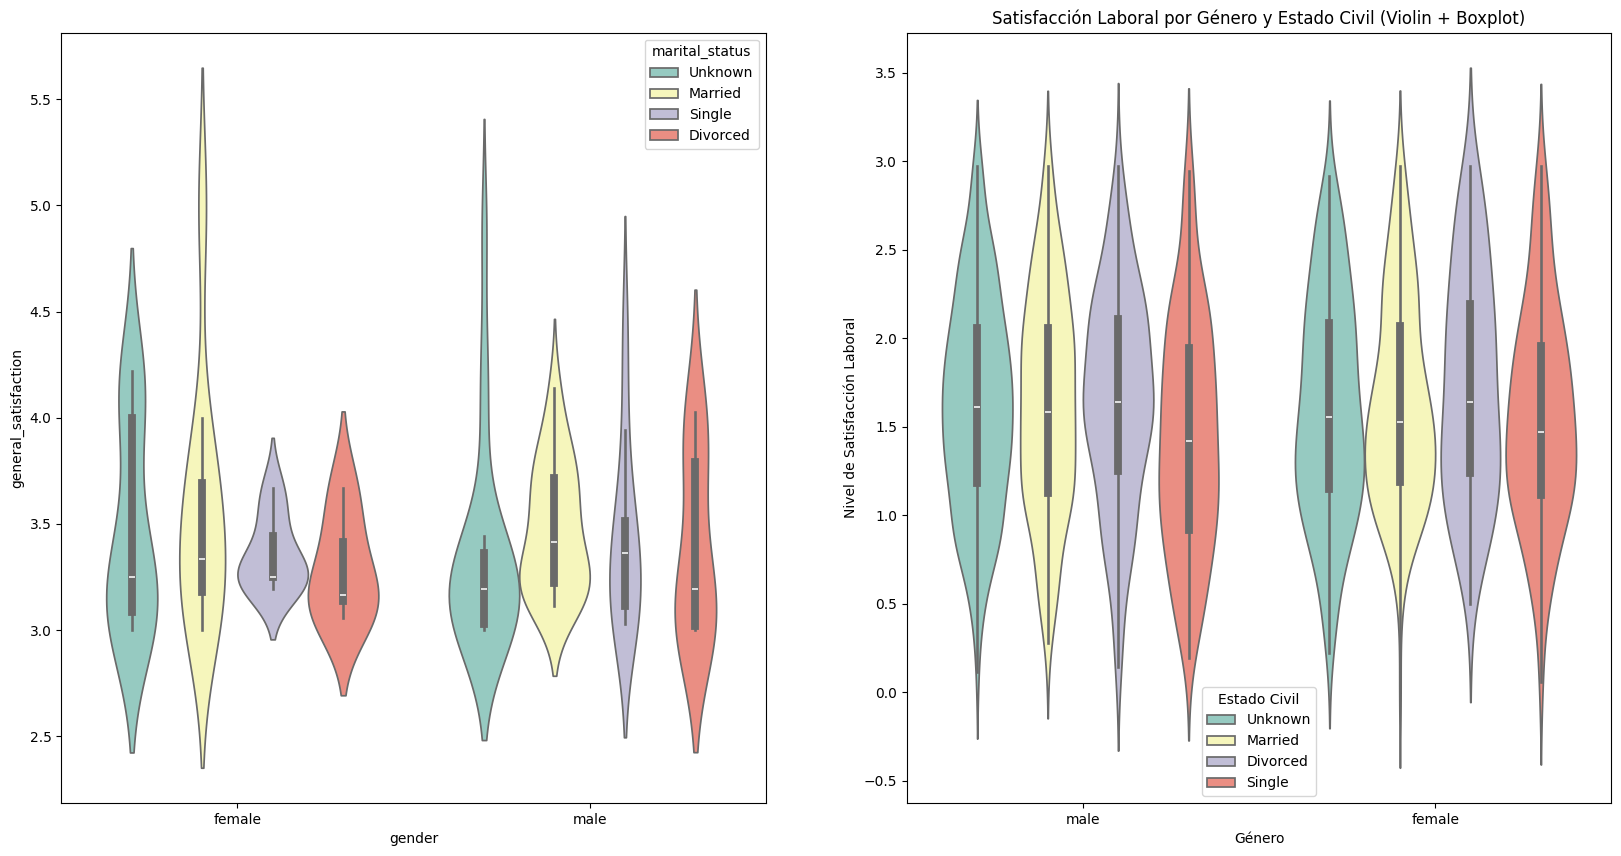

In [173]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.violinplot(data=df_a, x='gender', y='general_satisfaction', hue='marital_status', inner='box', palette='Set3', ax = axes[0])
plt.title('Satisfacción Laboral por Género y Estado Civil (Violin + Boxplot)')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.legend(title='Estado Civil')


sns.violinplot(data=df_b, x='gender', y='general_satisfaction', hue='marital_status', inner='box', palette='Set3', ax = axes[1])
plt.title('Satisfacción Laboral por Género y Estado Civil (Violin + Boxplot)')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.legend(title='Estado Civil')


In [174]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.violinplot(data=df_stayers, x='gender', y='general_satisfaction', hue='marital_status', inner='box', palette='Set3', order= ax= axes[0])
plt.title('Satisfacción Laboral por Género y Estado Civil stayers (Violin + Boxplot)')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.legend(title='Estado Civil')

sns.violinplot(data=df_leavers, x='gender', y='general_satisfaction', hue='marital_status', inner='box', palette='Set3', ax= axes[1])
plt.title('Satisfacción Laboral por Género y Estado Civil leavers (Violin + Boxplot)')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.legend(title='Estado Civil')

SyntaxError: invalid syntax (3723144822.py, line 2)

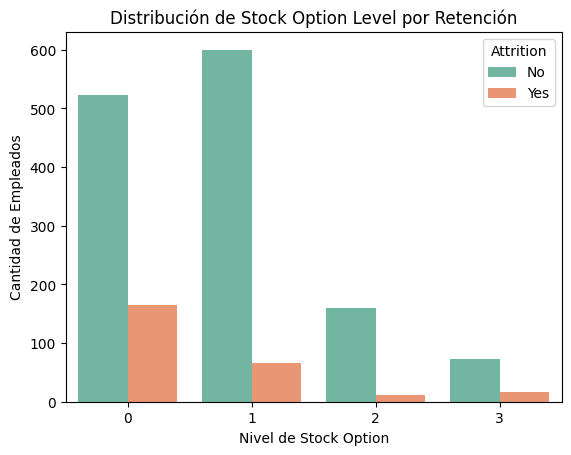

In [47]:
# podemos ver como se distribuye  el nivel de opciones sobre las acciones en las personas empleadas que se quedan y las que se van
# Crear gráfico de barras para stock_option_level y attrition
sns.countplot(data=df_abc, x='stock_option_level', hue='attrition', palette='Set2')
plt.title('Distribución de Stock Option Level por Retención')
plt.xlabel('Nivel de Stock Option')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Attrition')
plt.show()

C:\Users\trico\AppData\Local\Temp\ipykernel_23572\698200888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_abc, x='attrition', y='training_time_last_year', palette='Set3', inner='quartile')


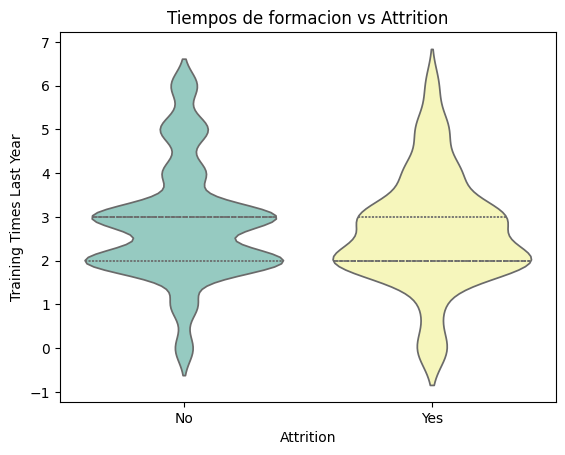

In [48]:
# podemos ver la distribución de la formación recibida el último año entre las personas que se van y se quedan 
# podemos ver si las personas que se quedan o se van han recibido mas o menos formación en el último año
# Gráfico de violín para training_times_last_year y attrition
sns.violinplot(data=df_abc, x='attrition', y='training_time_last_year', palette='Set3', inner='quartile')
plt.title('Tiempos de formacion vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Training Times Last Year')
plt.show()

([<matplotlib.axis.XTick at 0x25533b31590>,
 [Text(0, 0, 'Se Quedaron'), Text(1, 0, 'Se Fueron')])

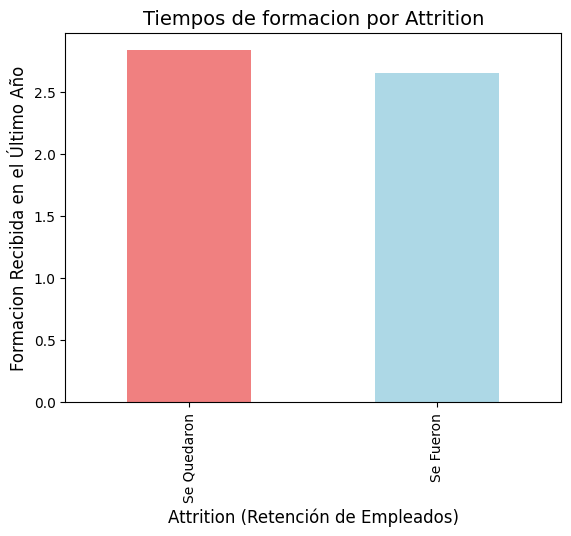

In [176]:
# Promedio de formación recibida vs Rotación

contar = df_abc.groupby('attrition')['training_time_last_year'].mean()

# Crear gráfico de barras 1
contar.plot(kind='bar', color=['lightcoral', 'lightblue'])

# Añadir títulos y etiquetas
plt.title('Tiempos de formacion por Attrition', fontsize=14)
plt.xlabel('Attrition (Retención de Empleados)', fontsize=12)
plt.ylabel('Formacion Recibida en el Último Año', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Se Quedaron', 'Se Fueron'])



In [94]:
# Crear gráfico de barras 1
salary_hike = df_abc.groupby("attrition")["gender"].mean()
salary_hike


TypeError: agg function failed [how->mean,dtype->object]

In [65]:
# Gráfico de cajas para comparar años en la empresa y tiempo de entrenamiento con attrition
sns.boxplot(data=df_abc, x='attrition', y='years_at_company', hue='training_times_bins', palette='Set3')
plt.title('Distribución de Años en la Empresa por Attrition y Tiempos de Entrenamiento')
plt.xlabel('Attrition')
plt.ylabel('Años en la Empresa')
plt.legend(title='Tiempos de Entrenamiento (años)')
plt.show()

ValueError: Could not interpret value `training_times_bins` for `hue`. An entry with this name does not appear in `data`.

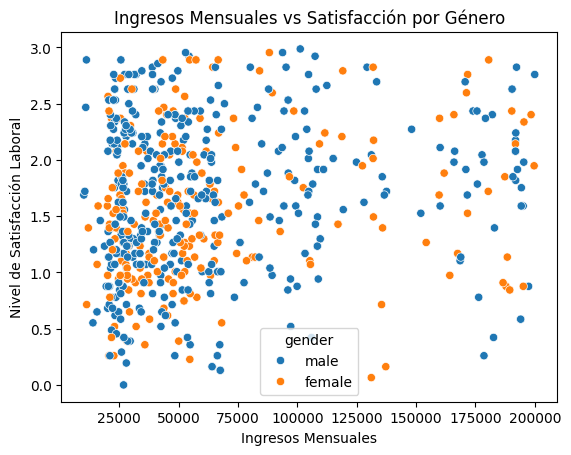

In [116]:
sns.scatterplot(data=df_b, x='monthly_income', y='general_satisfaction', hue='gender')
plt.title('Ingresos Mensuales vs Satisfacción por Género')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.show()


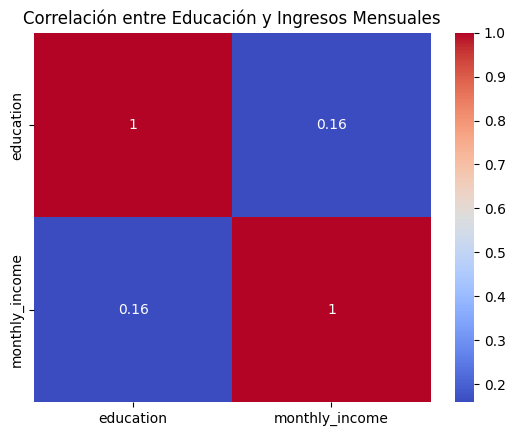

In [117]:
# Analizar la correlación entre educación e ingresos mensuales 
#¿podemos ver cómo varia la educación en relación a los  ingresos mensuales?
# Calcular la correlación
corr = df_a[['education', 'monthly_income']].corr()

# Visualizar la correlación en un heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre Educación y Ingresos Mensuales')
plt.show()


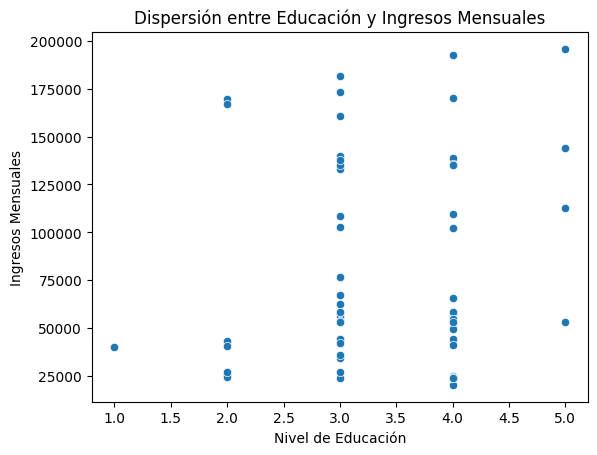

In [118]:
# Cada punto es una persona empleada ¿muestra la relación entre educación y los ingresos mensuales?

sns.scatterplot(data=df_a, x='education', y='monthly_income')
plt.title('Dispersión entre Educación y Ingresos Mensuales')
plt.xlabel('Nivel de Educación')
plt.ylabel('Ingresos Mensuales')
plt.show()


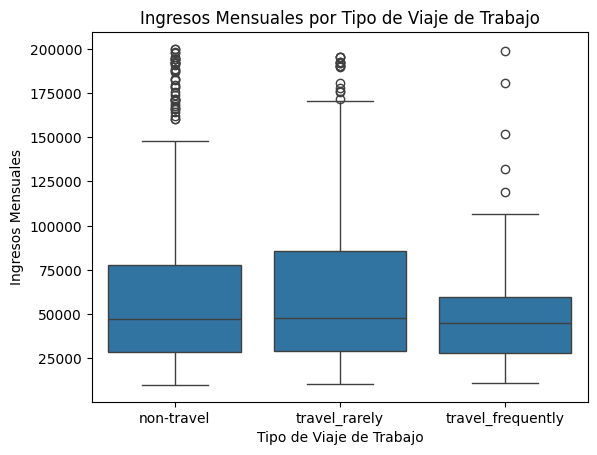

In [119]:
#Dispersión entre business_travel e ingresos mensuales 
#¿podemos ver la relación entre el tipo de viajes de trabajo y los ingresos?

sns.boxplot(data=df_b, x='business_travel', y='monthly_income')
plt.title('Ingresos Mensuales por Tipo de Viaje de Trabajo')
plt.xlabel('Tipo de Viaje de Trabajo')
plt.ylabel('Ingresos Mensuales')
plt.show()


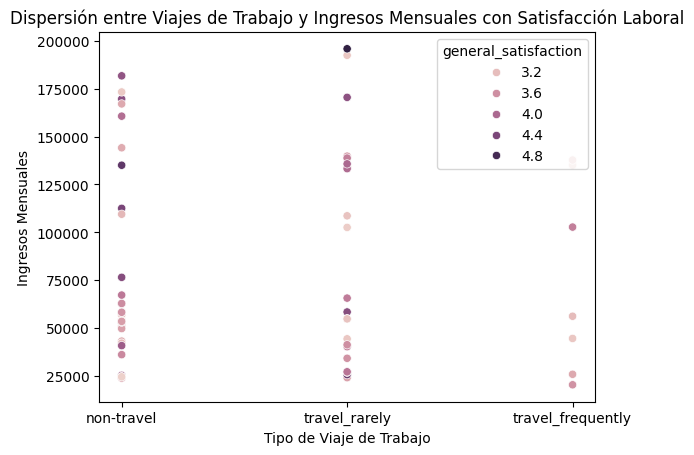

In [120]:
# sugerencia usar un boxplot que resuma la distribución de los ingresos para cada tipo de viaje 
#gráfico de dispersión entre viajes de trabajo e ingresos mensuales 
# ejemplo

sns.scatterplot(data=df_a, x='business_travel', y='monthly_income', hue='general_satisfaction')
plt.title('Dispersión entre Viajes de Trabajo y Ingresos Mensuales con Satisfacción Laboral')
plt.xlabel('Tipo de Viaje de Trabajo')
plt.ylabel('Ingresos Mensuales')
plt.show()


In [121]:
# COMPARAR EL NIVEL DE ROTACION EN FUNCION DEL GÉNERO E INGRESOS MENSUALES 
# Tratamos de observar si hay direncias significativas en la tasa de rotación según el género e ingresos 


In [122]:
# Agrupar por género y calcular la tasa de rotación

rotation_by_gender = df_abc.groupby('gender')['attrition'].value_counts(normalize=True).unstack()
rotation_by_gender.columns = ['No Attrition', 'Attrition']
rotation_by_gender['Attrition Rate'] = rotation_by_gender['Attrition'] * 100

print(rotation_by_gender)


        No Attrition  Attrition  Attrition Rate
gender                                         
female      0.850700   0.149300       14.930016
male        0.832132   0.167868       16.786818


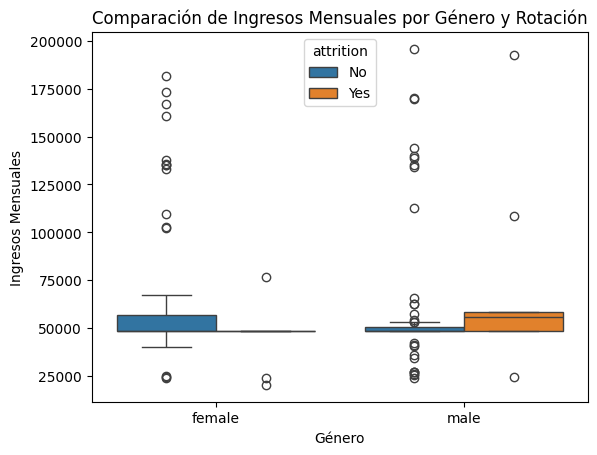

In [103]:
# Boxplot de ingresos mensuales por género y rotación
#¿podemos ver si los ingresos varían entre las personas que han rotado y quienes no, separdas por género?

sns.boxplot(data=df_a, x='gender', y='monthly_income', hue='attrition')
plt.title('Comparación de Ingresos Mensuales por Género y Rotación')
plt.xlabel('Género')
plt.ylabel('Ingresos Mensuales')
plt.show()


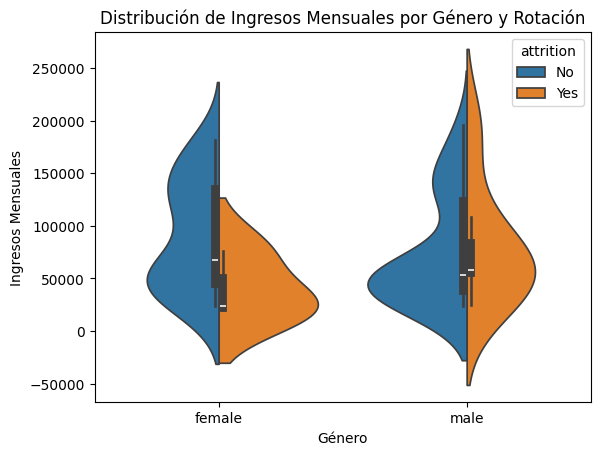

In [124]:
# Violin plot de ingresos mensuales por género y rotación
# ¿ esto es más útil para ver la distribucción completa de los ingresos mensuales por género y rotación?
sns.violinplot(data=df_a, x='gender', y='monthly_income', hue='attrition', split=True)
plt.title('Distribución de Ingresos Mensuales por Género y Rotación')
plt.xlabel('Género')
plt.ylabel('Ingresos Mensuales')
plt.show()


# ----------------------------------------------
# a partir de aquí no esta comentado lo estoy haciendo ahora

In [125]:
# ROTACIÓN POR NIVEL DE INGRESOS
# se dividen las personas empleadas en cuartiles o percentiles según ingresos para ver las tasas de rotación
#varian con diferentes niveles de ingresos

In [126]:
# código para dividir por percentiles
# Crear una columna de percentiles para monthly_income
df_a['income_percentile'] = pd.qcut(df_abc['monthly_income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Agrupar por género e income_percentile para calcular la tasa de rotación
rotation_by_income_gender = df_a.groupby(['income_percentile', 'gender'])['attrition'].value_counts(normalize=True).unstack()
rotation_by_income_gender.columns = ['No Attrition', 'Attrition']
rotation_by_income_gender['Attrition Rate'] = rotation_by_income_gender['Attrition'] * 100

print(rotation_by_income_gender)



                          No Attrition  Attrition  Attrition Rate
income_percentile gender                                         
Low               female      0.600000   0.400000       40.000000
                  male        0.857143   0.142857       14.285714
Medium            female      1.000000   0.000000        0.000000
                  male        1.000000   0.000000        0.000000
High              female      0.857143   0.142857       14.285714
                  male        0.733333   0.266667       26.666667
Very High         female      1.000000   0.000000        0.000000
                  male        0.818182   0.181818       18.181818


C:\Users\trico\AppData\Local\Temp\ipykernel_29368\1075968302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['income_percentile'] = pd.qcut(df_abc['monthly_income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
C:\Users\trico\AppData\Local\Temp\ipykernel_29368\1075968302.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rotation_by_income_gender = df_a.groupby(['income_percentile', 'gender'])['attrition'].value_counts(normalize=True).unstack()


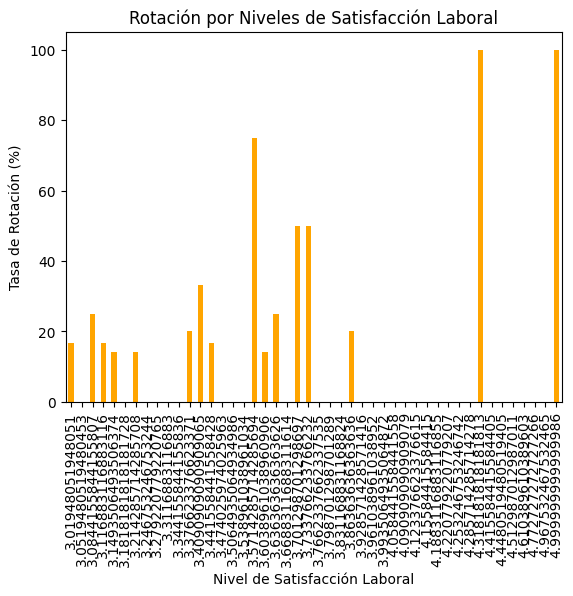

In [96]:
# Agrupar por niveles de satisfacción laboral y calcular la tasa de rotación
rotation_by_satisfaction = df_a.groupby('general_satisfaction')['attrition'].value_counts(normalize=True).unstack()
rotation_by_satisfaction.columns = ['No Attrition', 'Attrition']
rotation_by_satisfaction['Attrition Rate'] = rotation_by_satisfaction['Attrition'] * 100

# Graficar
rotation_by_satisfaction['Attrition Rate'].plot(kind=' bar', color='orange')
plt.title('Rotación por Niveles de Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Tasa de Rotación (%)')
plt.show()


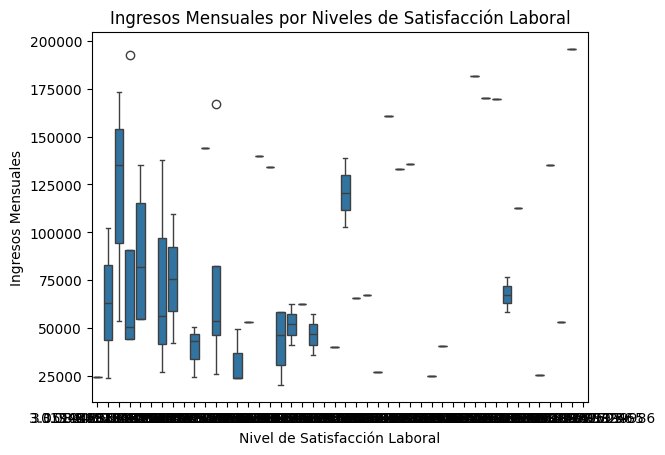

In [128]:
# Boxplot de ingresos mensuales por niveles de satisfacción laboral
sns.boxplot(data=df_a, x='general_satisfaction', y='monthly_income')
plt.title('Ingresos Mensuales por Niveles de Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Ingresos Mensuales')
plt.show()


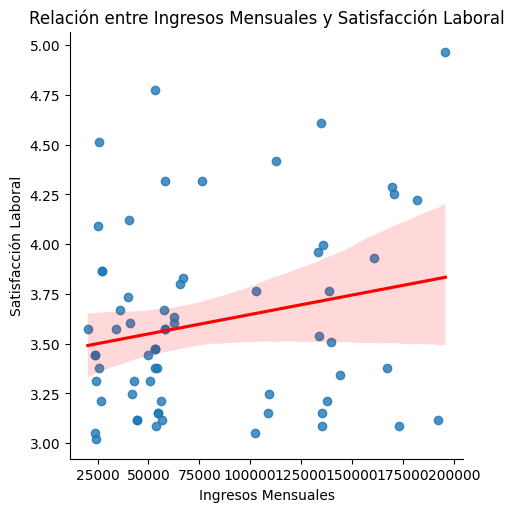

In [129]:
# Scatter plot con línea de tendencia
sns.lmplot(x='monthly_income', y='general_satisfaction', data=df_a, line_kws={'color': 'red'})
plt.title('Relación entre Ingresos Mensuales y Satisfacción Laboral')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Satisfacción Laboral')
plt.show()


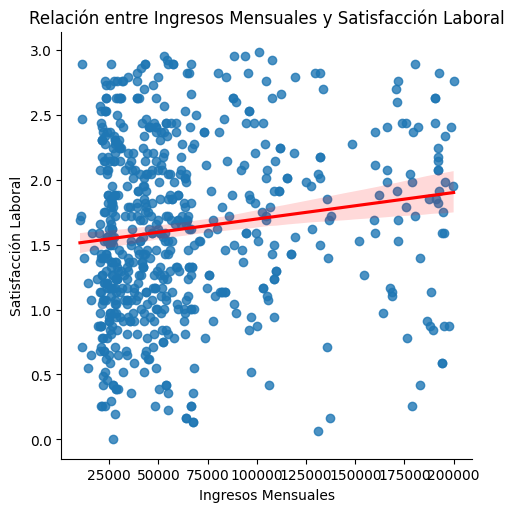

In [130]:
# Scatter plot con línea de tendencia
sns.lmplot(x='monthly_income', y='general_satisfaction', data=df_b, line_kws={'color': 'red'})
plt.title('Relación entre Ingresos Mensuales y Satisfacción Laboral')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Satisfacción Laboral')
plt.show()

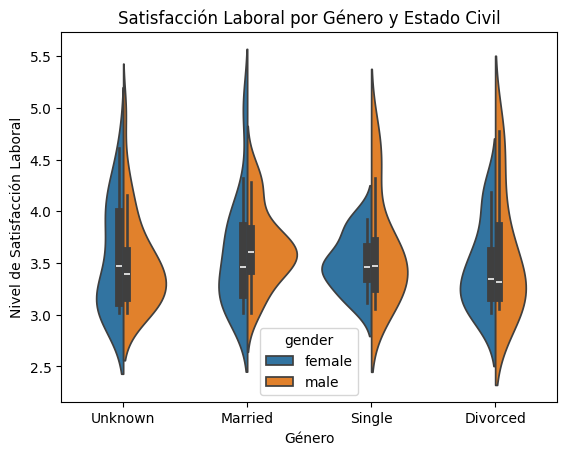

In [26]:
# Violin plot para satisfacción laboral por género
sns.violinplot(data=df_a, x='marital_status', y='general_satisfaction', hue='gender', split=True)
plt.title('Satisfacción Laboral por Género y Estado Civil')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Laboral')
plt.show()


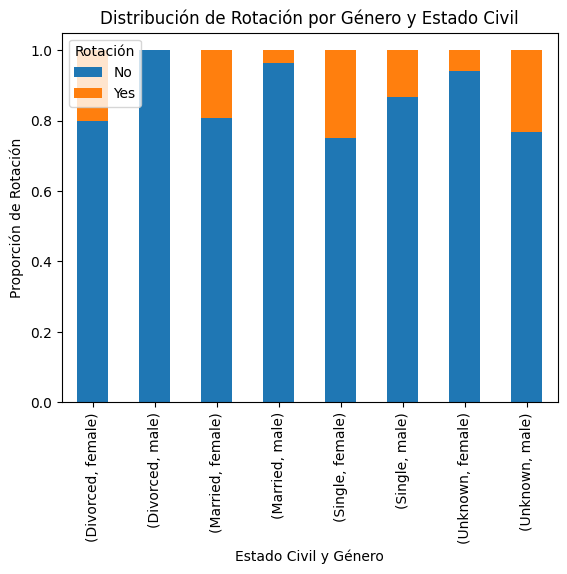

In [132]:
# Agrupar por estado civil y género y calcular la tasa de rotación
rotation_by_marital_gender = df_a.groupby(['marital_status', 'gender'])['attrition'].value_counts(normalize=True).unstack()

# Crear gráfico de barras apiladas
rotation_by_marital_gender.plot(kind='bar', stacked=True)
plt.title('Distribución de Rotación por Género y Estado Civil')
plt.xlabel('Estado Civil y Género')
plt.ylabel('Proporción de Rotación')
plt.legend(title='Rotación')
plt.show()


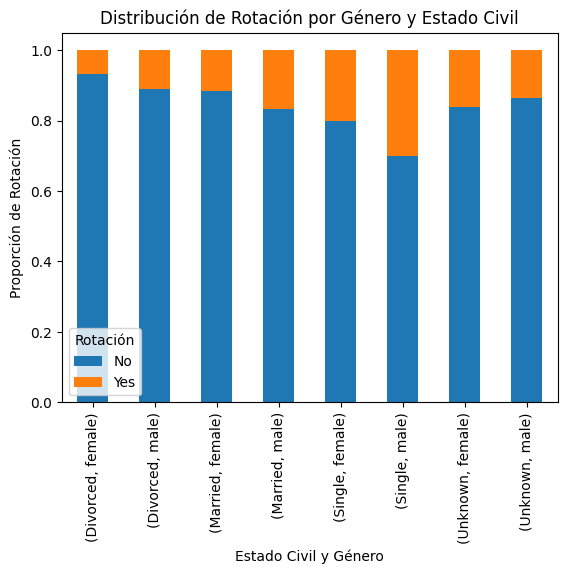

In [133]:
# Agrupar por estado civil y género y calcular la tasa de rotación
rotation_by_marital_gender = df_b.groupby(['marital_status', 'gender'])['attrition'].value_counts(normalize=True).unstack()

# Crear gráfico de barras apiladas
rotation_by_marital_gender.plot(kind='bar', stacked=True)
plt.title('Distribución de Rotación por Género y Estado Civil')
plt.xlabel('Estado Civil y Género')
plt.ylabel('Proporción de Rotación')
plt.legend(title='Rotación')
plt.show()

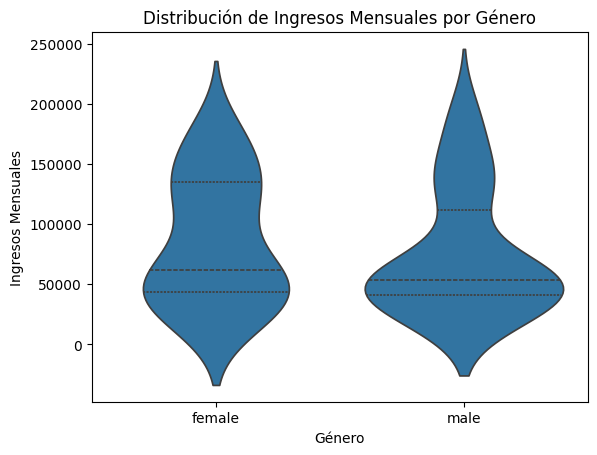

In [134]:
sns.violinplot(data=df_a, x='gender', y='monthly_income', inner="quart")
plt.title('Distribución de Ingresos Mensuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Mensuales')
plt.show()


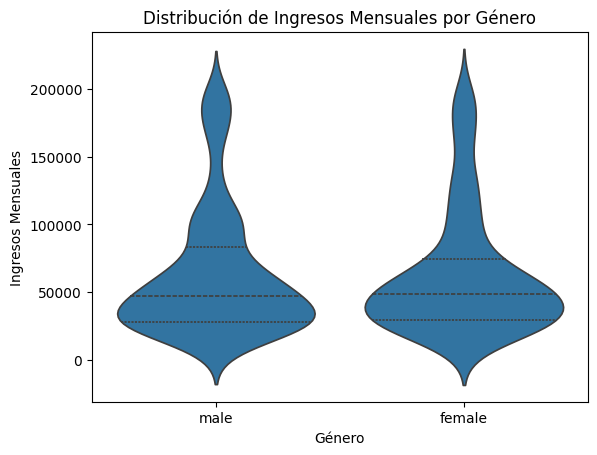

In [135]:
sns.violinplot(data=df_b, x='gender', y='monthly_income', inner="quart")
plt.title('Distribución de Ingresos Mensuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Mensuales')
plt.show()

In [136]:
# 1. Crear una figura y pruebo con distintos rangos 
plt.figure(figsize=(10, 6))

# 2. El ancho de las columnas y pruebo con distintos números
width = 0.4 

# 3. La estructura del eje x usamos el array rango y los agrupamos en una estructura única y unidimensional
months = np.arange(len(df_2017['Month'].unique()))

# 7. SINTAXIS DE BOXPLOT Creamos el gráfico de barras para 2017
plt.bar(months - width/2, df_2017.groupby('Month')['Flights Booked'].sum(), width=width, color="yellow",edgecolor="black", label="2017")

# 7. SINTAXIS DE BOXPLOT Creamos el gráfico de barras para 2018
plt.bar(months + width/2, df_2018.groupby('Month')['Flights Booked'].sum(), width=width, color="green", label="2018")

# Añadir etiquetas a los ejes y variamos el título 
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Vuelos Reservados', fontsize=15)
plt.title('Comparación de Vuelos Reservados por Mes en 2017 y 2018', fontsize=18)

# Añadir las etiquetas de los meses en el eje X con una rotación de 90 grados
plt.xticks(months, df_2017['Month'].unique(), rotation=90)

# Añadir leyenda para distinguir ambos años
plt.legend()

# Mostrar el gráfico
plt.show()

NameError: name 'df_2017' is not defined

<Figure size 1000x600 with 0 Axes>

#Index(['attrition', 'business_travel', 'daily_rate', 'distance_from_home',
       'education', 'education_field', 'environment_satisfaction', 'gender',
       'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_time', 'percent_salary_hike',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_time_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'role_department',
       'remote_work', 'department'],
      dtype='object')